<a href="https://colab.research.google.com/github/reitezuz/18NES2-2025/blob/main/week_05/irrelevant_features_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The effect of irrelevant input features – Fashion MNIST Dataset

Based on: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb

This example demonstrates the effect of irrelevant (even random) input features.

We use the **Fashion MNIST dataset**, a modern alternative to MNIST. It contains **70,000 images** of clothing items from 10 categories (e.g., shirts, shoes, bags), each of size **28×28 pixels**.  
The dataset is split into **60,000 training** and **10,000 test** samples.

**Goal:** Predict the correct clothing category for each input image.

**Dataset:**
- **Input:** 28×28 grayscale image  
- **Target:** integer label (0–9, 10 clothing classes)  
- **Samples:** 70,000 (60k train / 10k test)

**Dataset sources:**
- [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
- [Keras built-in dataset](https://keras.io/api/datasets/fashion_mnist/)


## Load and preprocess the data

In [8]:
# Load the Fashion MNIST dataset
import keras
import numpy as np


# Load the Fashion MNIST dataset
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Textual labels are not presented in the oroginal dataset:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

# 60000 training samples - images 28x28 in greyscale
print(train_images.shape, train_labels.shape)

# 10000 testing samples - images 28x28 in greyscale
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Observe the data:

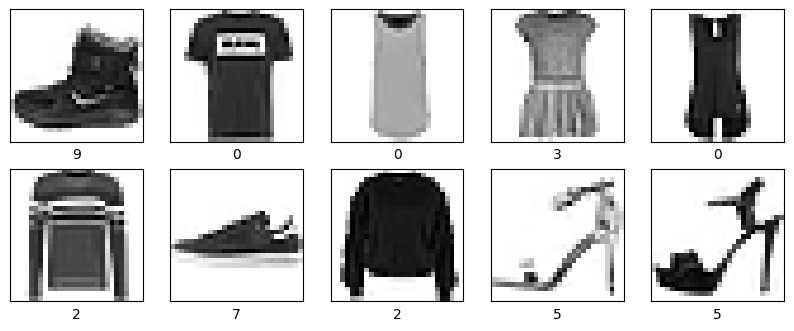

In [9]:
# Display some images

import matplotlib.pyplot as plt

# Display the first 10 images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  # Remove axis ticks and the grids
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # Display the current image using a binary color map
    plt.xlabel(train_labels[i])
plt.show()


## Preprocess the data


In [10]:


train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 28 * 28))], axis=1
)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 28 * 28))], axis=1
)


y_train_all = train_labels
y_test_all = test_labels


## Model training

In [11]:
# Data frame for results
import pandas as pd

columns = ["Model Name", "Train Accuracy", "Train Loss", "Time (s)", "Epochs", "Details"]
results_df = pd.DataFrame(columns=columns)


In [12]:
# plot the training progress:
def plot_histories(history1, history2, history3):
    history_dict = history.history
    print(history_dict.keys())

    from matplotlib import pyplot as plt

    # Plot training & validation accuracy values

    plt.plot(history1.history['val_accuracy'])
    plt.plot(history2.history['val_accuracy'])
    plt.plot(history3.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Validation 1', 'Validation 2', 'Validation 3'], loc='upper left')
    plt.show()



In [13]:
# plot the training progress:
def plot_history(history):
    history_dict = history.history
    print(history_dict.keys())

    from matplotlib import pyplot as plt

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()



## Original model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7551 - loss: 0.7111 - val_accuracy: 0.8503 - val_loss: 0.4129
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8622 - loss: 0.3840 - val_accuracy: 0.8597 - val_loss: 0.3830
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8778 - loss: 0.3319 - val_accuracy: 0.8723 - val_loss: 0.3443
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8845 - loss: 0.3149 - val_accuracy: 0.8635 - val_loss: 0.3640
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8936 - loss: 0.2897 - val_accuracy: 0.8803 - val_loss: 0.3230
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9023 - loss: 0.2688 - val_accuracy: 0.8857 - val_loss: 0.3145
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9034 - loss: 0.2653 - val_accuracy: 0.8832 - val_loss: 0.3310
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9063 - loss: 0.2535 - val_accu

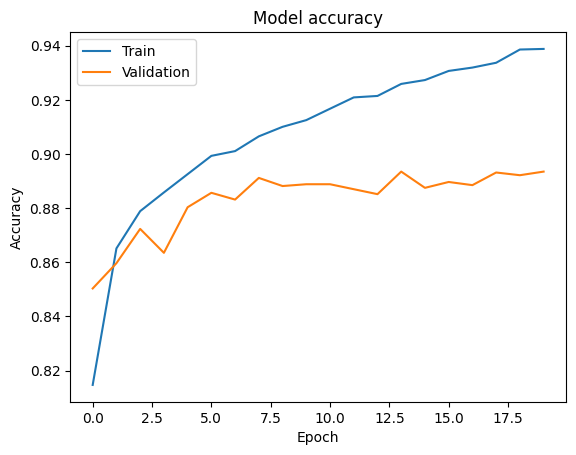

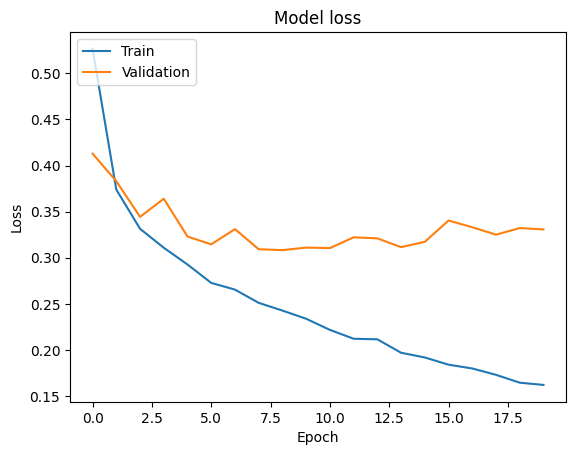

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9441 - loss: 0.1484
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8981 - loss: 0.3253
Training accuracy: 0.943407416343689 
Train loss: 0.14961254596710205
Validation accuracy: 0.8934999704360962 
Val loss: 0.3306911885738373
Results:
                          Model Name  Train Accuracy  Train Loss    Time (s)  \
0  fashion_mlp_20251020-204710.keras        0.943407    0.149613  122.726275   

  Epochs                        Details  
0     20  256-relu-False-ep.:20-bs:128   


/tmp/ipython-input-125040581.py:88: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([new_entry])], ignore_index=True)


In [14]:
# Set some of the hyperparameters:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images, y_train_all, test_size=0.1, random_state=42)


do_early_stopping = False
max_epochs = 20
batch_size = 128
num_neur_1 = 256 # number of neurons in the first hidden layer
num_neur_2 = 128 # number of neurons in the second hidden layer
# num_neur_3 = 50 # number of neurons in the third hidden layer
hidden_activation = 'relu'
do_tensorboard = True
details = "" # your comment
# already set: do_tanh, do_one_hot_encoding
# further hyperparameters: optimizer, loss, metrics,...

###############################################
# Define the model architecture
from keras import layers
model = keras.Sequential([
    layers.InputLayer(shape=(28 * 28,)),    # Input layer
    layers.Dense(num_neur_1, activation=hidden_activation), # First hidden layer   # , kernel_initializer='he_normal', bias_initializer='zeros')
    layers.Dense(num_neur_2, activation=hidden_activation), # Second hidden layer
    # layers.Dense(num_neur_3, activation=hidden_activation), # Third hidden layer
    layers.Dense(10, activation='softmax')  # Output layer for multiclass classification
])
import datetime
model_name = "fashion_mlp_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.keras'
model.summary()

# Configure the model:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001), # Adam, RMSProp
                  loss= keras.losses.SparseCategoricalCrossentropy(),
                  metrics= [keras.metrics.SparseCategoricalAccuracy("accuracy")])

###############################################
# Define callbacks (e.g., early stopping):
callbacks = []
if do_early_stopping:
    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
    callbacks.append(early_stopping)
if do_tensorboard:
    from keras.callbacks import TensorBoard
    tensorboard_callback = TensorBoard(log_dir="./logs_fashion/"+model_name, histogram_freq=1, write_steps_per_second=True)
    callbacks.append(tensorboard_callback)

################################################
# Train the model
import time
start_time = time.time()
history = model.fit(x_train, y_train, epochs=max_epochs, batch_size=batch_size, validation_data=(x_val, y_val),
                    callbacks=callbacks)
time_fit = time.time() - start_time

###############################
# Plot the training progress:
plot_history(history)

# Evaluate the model on the training, validation and test sets
train_loss, train_acc = model.evaluate(x_train, y_train)
val_loss, val_acc = model.evaluate(x_val, y_val)

print('Training accuracy:', train_acc, '\nTrain loss:', train_loss)
print('Validation accuracy:', val_acc, '\nVal loss:', val_loss)


###############################
# Save the model:
import os
model_dir = "./models/"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
model.save(model_dir + model_name)

#################################
# Add results to the dataframe:
model_details = f"{num_neur_1}-{hidden_activation}-{do_early_stopping}-ep.:{max_epochs}-bs:{batch_size} {details}"
new_entry = {
    "Model Name" : model_name,
    "Details" : model_details,
    "Train Accuracy" : train_acc,
    "Train Loss" : train_loss,
    "Time (s)" : time_fit,
    "Epochs" : len(history.epoch),
}
results_df = pd.concat([results_df, pd.DataFrame([new_entry])], ignore_index=True)
# View and and save the dataframe:
results_df.to_csv(model_dir + "fashion_results.csv", index=False)
print("Results:")
print(results_df)
history_orig = history

## Model with noisy channels

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,850 (1.66 MB)

 Trainable params: 435,850 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7165 - loss: 0.7951 - val_accuracy: 0.8350 - val_loss: 0.4363
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8467 - loss: 0.4209 - val_accuracy: 0.8548 - val_loss: 0.3955
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8630 - loss: 0.3708 - val_accuracy: 0.8500 - val_loss: 0.4093
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8723 - loss: 0.3414 - val_accuracy: 0.8593 - val_loss: 0.3809
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8810 - loss: 0.3173 - val_accuracy: 0.8653 - val_loss: 0.3593
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8947 - loss: 0.2826 - val_accuracy: 0.8603 - val_loss: 0.3921
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8983 - loss: 0.2660 - val_accuracy: 0.8768 - val_loss: 0.3564
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9074 - loss: 0.2460 - val_ac

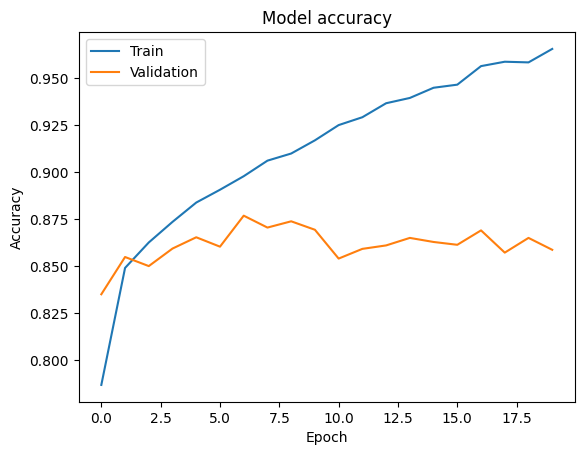

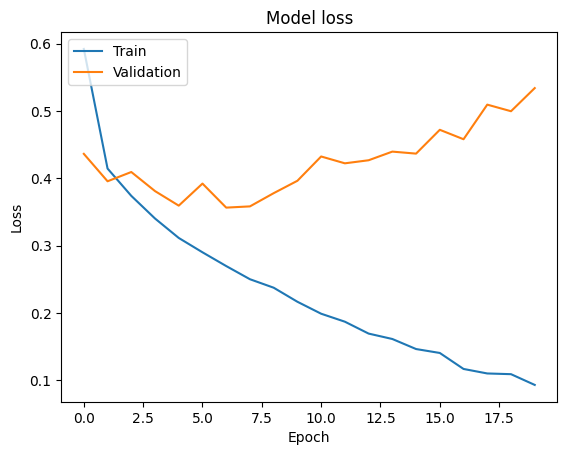

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9636 - loss: 0.0976
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8624 - loss: 0.5273
Training accuracy: 0.9634814858436584 
Train loss: 0.09780224412679672
Validation accuracy: 0.8586666584014893 
Val loss: 0.5340760946273804
Results:
                               Model Name  Train Accuracy  Train Loss  \
0       fashion_mlp_20251020-204710.keras        0.943407    0.149613   
1  fashion_mlp_noise20251020-204921.keras        0.963481    0.097802   

     Time (s) Epochs                        Details  
0  122.726275     20  256-relu-False-ep.:20-bs:128   
1  160.098232     20  256-relu-False-ep.:20-bs:128   


In [15]:
# Set some of the hyperparameters:
x_train, x_val, y_train, y_val = train_test_split(train_images_with_noise_channels, y_train_all, test_size=0.1, random_state=42)

do_early_stopping = False
max_epochs = 20
batch_size = 128
num_neur_1 = 256 # number of neurons in the first hidden layer
num_neur_2 = 128 # number of neurons in the second hidden layer
# num_neur_3 = 50 # number of neurons in the third hidden layer
hidden_activation = 'relu'
do_tensorboard = True
details = "" # your comment
# already set: do_tanh, do_one_hot_encoding
# further hyperparameters: optimizer, loss, metrics,...

###############################################
# Define the model architecture
from keras import layers
model = keras.Sequential([
    layers.InputLayer(shape=(28 * 28 * 2,)),    # Input layer
    layers.Dense(num_neur_1, activation=hidden_activation), # First hidden layer   # , kernel_initializer='he_normal', bias_initializer='zeros')
    layers.Dense(num_neur_2, activation=hidden_activation), # Second hidden layer
    # layers.Dense(num_neur_3, activation=hidden_activation), # Third hidden layer
    layers.Dense(10, activation='softmax')  # Output layer for multiclass classification
])
import datetime
model_name = "fashion_mlp_noise" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.keras'
model.summary()

# Configure the model:

model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001), # Adam, RMSProp
              loss= keras.losses.SparseCategoricalCrossentropy(),
              metrics= [keras.metrics.SparseCategoricalAccuracy("accuracy")])

###############################################
# Define callbacks (e.g., early stopping):
callbacks = []
if do_early_stopping:
    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
    callbacks.append(early_stopping)
if do_tensorboard:
    from keras.callbacks import TensorBoard
    tensorboard_callback = TensorBoard(log_dir="./logs_fashion/"+model_name, histogram_freq=1, write_steps_per_second=True)
    callbacks.append(tensorboard_callback)

################################################
# Train the model
import time
start_time = time.time()
history = model.fit(x_train, y_train, epochs=max_epochs, batch_size=batch_size, validation_data=(x_val, y_val),
                    callbacks=callbacks)
time_fit = time.time() - start_time

###############################
# Plot the training progress:
plot_history(history)

# Evaluate the model on the training, validation and test sets
train_loss, train_acc = model.evaluate(x_train, y_train)
val_loss, val_acc = model.evaluate(x_val, y_val)

print('Training accuracy:', train_acc, '\nTrain loss:', train_loss)
print('Validation accuracy:', val_acc, '\nVal loss:', val_loss)


###############################
# Save the model:
import os
model_dir = "./models/"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
model.save(model_dir + model_name)

#################################
# Add results to the dataframe:
model_details = f"{num_neur_1}-{hidden_activation}-{do_early_stopping}-ep.:{max_epochs}-bs:{batch_size} {details}"
new_entry = {
    "Model Name" : model_name,
    "Details" : model_details,
    "Train Accuracy" : train_acc,
    "Train Loss" : train_loss,
    "Time (s)" : time_fit,
    "Epochs" : len(history.epoch),
}
results_df = pd.concat([results_df, pd.DataFrame([new_entry])], ignore_index=True)
# View and and save the dataframe:
results_df.to_csv(model_dir + "fashion_results.csv", index=False)
print("Results:")
print(results_df)
history_noise = history


## Model with zero channels



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,850 (1.66 MB)

 Trainable params: 435,850 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7619 - loss: 0.6942 - val_accuracy: 0.8365 - val_loss: 0.4416
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8552 - loss: 0.3920 - val_accuracy: 0.8710 - val_loss: 0.3650
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8738 - loss: 0.3471 - val_accuracy: 0.8773 - val_loss: 0.3456
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8855 - loss: 0.3127 - val_accuracy: 0.8700 - val_loss: 0.3525
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8884 - loss: 0.2976 - val_accuracy: 0.8793 - val_loss: 0.3310
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8944 - loss: 0.2799 - val_accuracy: 0.8580 - val_loss: 0.3871
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8980 - loss: 0.2699 - val_accuracy: 0.8837 - val_loss: 0.3135
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9038 - loss: 0.2535 - val_acc

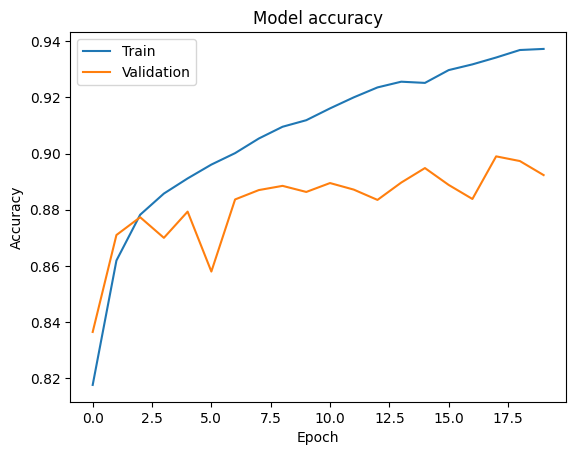

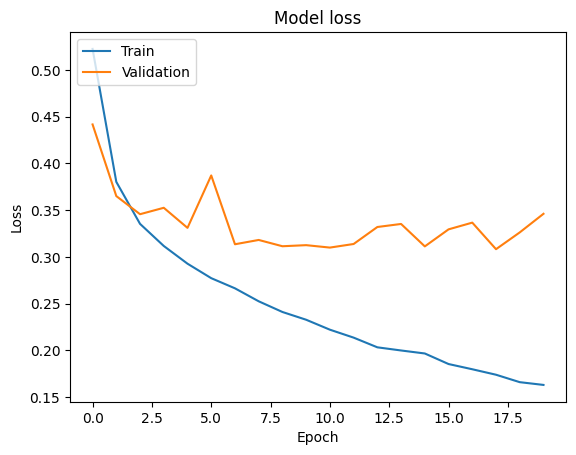

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9445 - loss: 0.1490
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8949 - loss: 0.3368
Training accuracy: 0.9440740942955017 
Train loss: 0.14967972040176392
Validation accuracy: 0.8923333287239075 
Val loss: 0.3460589647293091
Results:
                               Model Name  Train Accuracy  Train Loss  \
0       fashion_mlp_20251020-204710.keras        0.943407    0.149613   
1  fashion_mlp_noise20251020-204921.keras        0.963481    0.097802   
2  fashion_mlp_noise20251020-205529.keras        0.944074    0.149680   

     Time (s) Epochs                        Details  
0  122.726275     20  256-relu-False-ep.:20-bs:128   
1  160.098232     20  256-relu-False-ep.:20-bs:128   
2  162.313854     20  256-relu-False-ep.:20-bs:128   


In [17]:
# Set some of the hyperparameters:
x_train, x_val, y_train, y_val = train_test_split(train_images_with_zeros_channels, y_train_all, test_size=0.1, random_state=42)

do_early_stopping = False
max_epochs = 20
batch_size = 128
num_neur_1 = 256 # number of neurons in the first hidden layer
num_neur_2 = 128 # number of neurons in the second hidden layer
# num_neur_3 = 50 # number of neurons in the third hidden layer
hidden_activation = 'relu'
do_tensorboard = True
details = "" # your comment
# already set: do_tanh, do_one_hot_encoding
# further hyperparameters: optimizer, loss, metrics,...

###############################################
# Define the model architecture
from keras import layers
model = keras.Sequential([
    layers.InputLayer(shape=(28 * 28 * 2,)),    # Input layer
    layers.Dense(num_neur_1, activation=hidden_activation), # First hidden layer   # , kernel_initializer='he_normal', bias_initializer='zeros')
    layers.Dense(num_neur_2, activation=hidden_activation), # Second hidden layer
    # layers.Dense(num_neur_3, activation=hidden_activation), # Third hidden layer
    layers.Dense(10, activation='softmax')  # Output layer for multiclass classification
])
import datetime
model_name = "fashion_mlp_noise" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.keras'
model.summary()

# Configure the model:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001), # Adam, RMSProp
                  loss= keras.losses.SparseCategoricalCrossentropy(),
                  metrics= [keras.metrics.SparseCategoricalAccuracy("accuracy")])

###############################################
# Define callbacks (e.g., early stopping):
callbacks = []
if do_early_stopping:
    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
    callbacks.append(early_stopping)
if do_tensorboard:
    from keras.callbacks import TensorBoard
    tensorboard_callback = TensorBoard(log_dir="./logs_fashion/"+model_name, histogram_freq=1, write_steps_per_second=True)
    callbacks.append(tensorboard_callback)

################################################
# Train the model
import time
start_time = time.time()
history = model.fit(x_train, y_train, epochs=max_epochs, batch_size=batch_size, validation_data=(x_val, y_val),
                    callbacks=callbacks)
time_fit = time.time() - start_time

###############################
# Plot the training progress:
plot_history(history)

# Evaluate the model on the training, validation and test sets
train_loss, train_acc = model.evaluate(x_train, y_train)
val_loss, val_acc = model.evaluate(x_val, y_val)

print('Training accuracy:', train_acc, '\nTrain loss:', train_loss)
print('Validation accuracy:', val_acc, '\nVal loss:', val_loss)

###############################
# Save the model:
import os
model_dir = "./models/"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
model.save(model_dir + model_name)

#################################
# Add results to the dataframe:
model_details = f"{num_neur_1}-{hidden_activation}-{do_early_stopping}-ep.:{max_epochs}-bs:{batch_size} {details}"
new_entry = {
    "Model Name" : model_name,
    "Details" : model_details,
    "Train Accuracy" : train_acc,
    "Train Loss" : train_loss,
    "Time (s)" : time_fit,
    "Epochs" : len(history.epoch),
}
results_df = pd.concat([results_df, pd.DataFrame([new_entry])], ignore_index=True)
# View and and save the dataframe:
results_df.to_csv(model_dir + "fashion_results.csv", index=False)
print("Results:")
print(results_df)
history_zeros = history

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


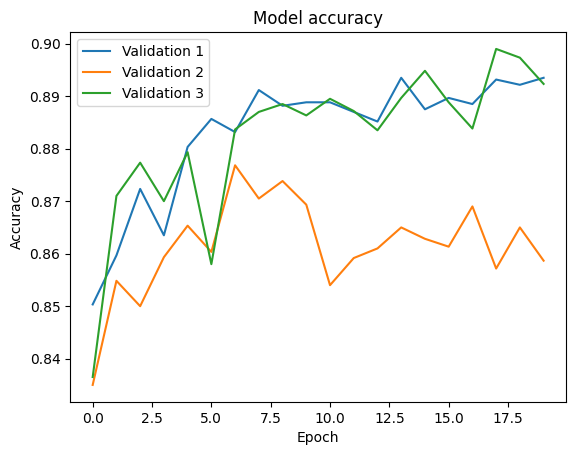

In [18]:
plot_histories(history_orig, history_noise, history_zeros)

In [19]:
results_df

,Model Name,Train Accuracy,Train Loss,Time (s),Epochs,Details
0,fashion_mlp_20251020-204710.keras,0.943407,0.149613,122.726275,20,256-relu-False-ep.:20-bs:128
1,fashion_mlp_noise20251020-204921.keras,0.963481,0.097802,160.098232,20,256-relu-False-ep.:20-bs:128
2,fashion_mlp_noise20251020-205529.keras,0.944074,0.149680,162.313854,20,256-relu-False-ep.:20-bs:128


In [ ]:
###############################################
# Load TensorBoard notebook extension
%load_ext tensorboard

# Start TensorBoard before training begins
%tensorboard --logdir logs_fashion --reload_interval=1